In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## 1. Carga de datos y análisis exploratorio

In [2]:
# Cargar el dataset de ejemplo
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
# Estadísticas descriptivas
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


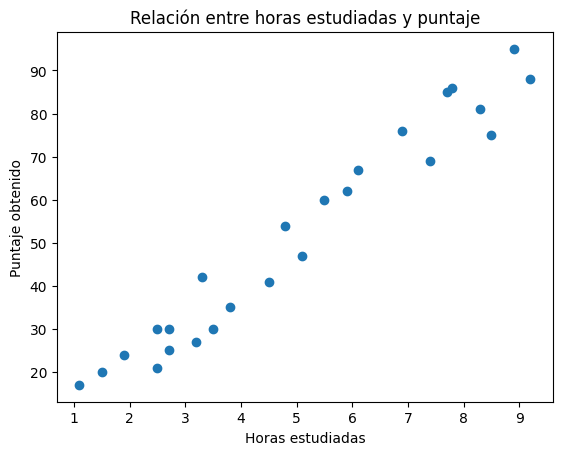

In [10]:
# Visualización de la relación entre horas estudiadas y puntaje
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Horas estudiadas')
plt.ylabel('Puntaje obtenido')
plt.title('Relación entre horas estudiadas y puntaje')
plt.show()

**Insight inicial:**\n
Se observa una relación positiva entre las horas estudiadas y el puntaje obtenido. A mayor cantidad de horas, mayor puntaje en la evaluación.

## 2. Implementación del algoritmo de descenso de gradiente para regresión lineal

In [6]:
# Preparar los datos como arreglos de NumPy
X = df['Hours'].values
y = df['Scores'].values
n = len(X)  # cantidad de observaciones

# Inicializar parámetros del modelo
m = 0.0  # pendiente
b = 0.0  # intercepto

# Hiperparámetros del descenso de gradiente
learning_rate = 0.01   # tasa de aprendizaje
epochs = 1000          # número de iteraciones

# Para guardar la evolución de la función de costo
losses = []

for epoch in range(epochs):
    # Predicciones actuales
    y_pred = m * X + b

    # Costo (MSE) solo para monitoreo
    loss = mean_squared_error(y, y_pred)
    losses.append(loss)

    # Derivadas parciales de la función de costo respecto de m y b
    D_m = (-2/n) * np.sum(X * (y - y_pred))
    D_b = (-2/n) * np.sum(y - y_pred)

    # Actualización de parámetros en la dirección opuesta al gradiente
    m = m - learning_rate * D_m
    b = b - learning_rate * D_b

print(f'Parámetros finales: m = {m:.4f}, b = {b:.4f}')

Parámetros finales: m = 9.7789, b = 2.4645


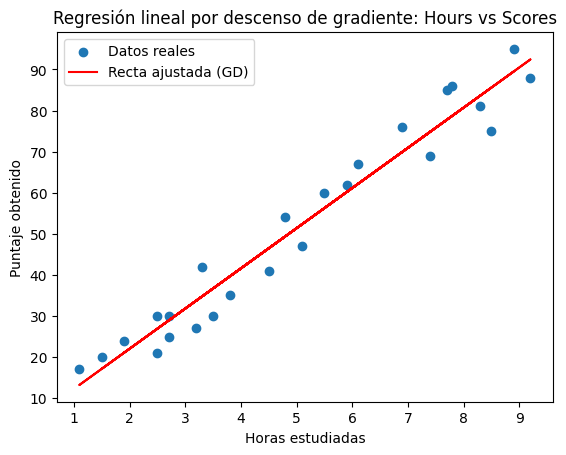

In [7]:
# Visualizar la recta ajustada sobre los datos
plt.scatter(X, y, label='Datos reales')
plt.plot(X, m * X + b, color='red', label='Recta ajustada (GD)')
plt.xlabel('Horas estudiadas')
plt.ylabel('Puntaje obtenido')
plt.title('Regresión lineal por descenso de gradiente: Hours vs Scores')
plt.legend()
plt.show()

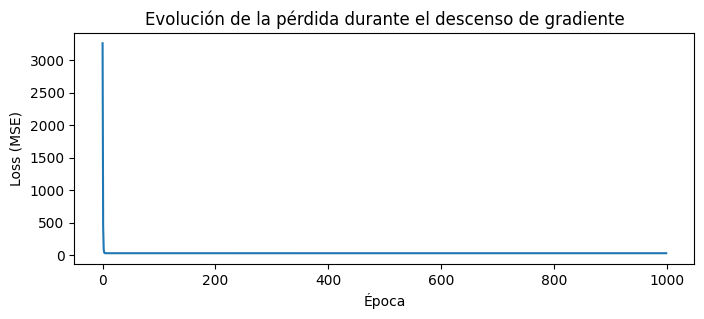

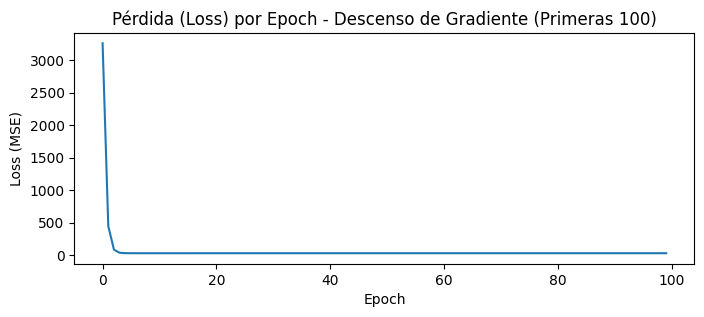

In [8]:
# Curva de la función de costo (MSE) a lo largo de las épocas
plt.figure(figsize=(8,3))
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Evolución de la pérdida durante el descenso de gradiente')
plt.show()

plt.figure(figsize=(8,3))
plt.plot(losses[:100])
plt.title('Pérdida (Loss) por Epoch - Descenso de Gradiente (Primeras 100)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.show()

## 3. Métricas de ajuste y error del modelo

In [9]:
# Predicciones finales con los parámetros aprendidos
y_pred_final = m * X + b

# Cálculo de métricas de error y ajuste
mse = mean_squared_error(y, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_final)

print(f'MSE : {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R^2 : {r2:.4f}')

MSE : 28.8828
RMSE: 5.3743
R^2 : 0.9529


**Interpretación de las métricas:**
- Un MSE y RMSE bajos indican que las predicciones del modelo de puntajes están, en promedio, cerca de los valores reales.
- Un $R^2$ cercano a 1 indica que el modelo explica gran parte de la variabilidad de los puntajes a partir de las horas estudiadas.
